In [1]:
from datetime import date
import time
import pyvo
import numpy as np
import pandas as pd
import astropy.units as u
from astropy.table import Table
from astropy.table import hstack
from astropy.coordinates import SkyCoord
from matplotlib import pyplot as plt

In [2]:
service = pyvo.dal.TAPService ('https://irsa.ipac.caltech.edu/TAP')
result = service.run_async("""
            SELECT
            galname,
            ra,
            dec,
            fnu_12,
            fnu_25,
            fnu_60,
            fnu_100,
            rat_12_25,
            rat_25_60,
            rat_60_100
            
            FROM irasgal
            ORDER BY galname ASC""")
table = result.to_table()

In [3]:
len(table)

11444

In [4]:
# Razones que faltan
rat_12_60 = table['fnu_12']/table['fnu_60']
rat_12_100 = table['fnu_12']/table['fnu_100']
rat_25_100 = table['fnu_25']/table['fnu_100']

# Ingresar a la tabla:
table["rat_12_60"]= rat_12_60
table["rat_12_100"]= rat_12_100
table["rat_25_100"]= rat_25_100

In [5]:
# Ordenar la tabla:
table = table[["galname", "ra", "dec", "fnu_12", "fnu_25", "fnu_60", "fnu_100", "rat_12_25", "rat_12_60", "rat_12_100", "rat_25_60", "rat_25_100", "rat_60_100"]]
table[0:5]

galname,ra,dec,fnu_12,fnu_25,fnu_60,fnu_100,rat_12_25,rat_12_60,rat_12_100,rat_25_60,rat_25_100,rat_60_100
,degrees,degrees,Jy,Jy,Jy,Jy,,,,,,
object,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
00000-0359,0.6448,-3.7105,0.25,0.33,1.21,2.49,0.7576,0.20661156,0.1004016,0.2727,0.13253012,0.4859
00001+0827,0.6663,8.7373,0.25,0.28,0.70,1.19,0.8929,0.35714287,0.21008402,0.4000,0.2352941,0.5882
00003+0313,0.7196,3.5042,0.25,0.32,0.52,1.12,0.7812,0.48076925,0.22321428,0.6154,0.28571427,0.4643
00003-3431,0.7281,-34.2385,1.06,0.25,0.80,2.57,4.2400,1.3249999,0.41245136,0.3125,0.09727627,0.3113
00005+2140,0.7878,21.9597,0.25,1.05,4.25,4.51,0.2381,0.05882353,0.055432368,0.2471,0.23281594,0.9424


In [6]:
# Logs sencillos:
Log_fnu_12=np.log(table['fnu_12'])
Log_fnu_25=np.log(table['fnu_25'])
Log_fnu_60=np.log(table['fnu_60'])
Log_fnu_100=np.log(table['fnu_100'])

In [7]:
# Logs de razones:
Log_12_25=np.log(table['rat_12_25'])
Log_12_60=np.log(table['rat_12_60'])
Log_12_100=np.log(table['rat_12_100'])
Log_25_60=np.log(table['rat_25_60'])
Log_25_100=np.log(table['rat_25_100'])
Log_60_100=np.log(table['rat_60_100'])

## 1.1 Gráficos sencillas

Log 12/ Log 25  
Log 12/ Log 60  
Log 12/ Log 100  
Log 25/ Log 60 

Text(0, 0.5, 'Log_fnu_12')

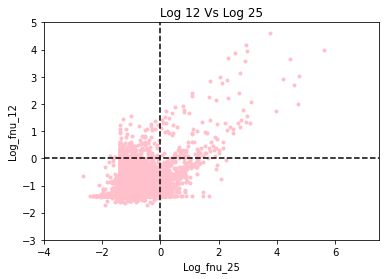

In [8]:
# Log 12/ Log 25

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Log_fnu_25, Log_fnu_12, marker=".", color="pink")

ax.set_xlim([-4, 7.5])
ax.set_ylim([-3, 5])

plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')

plt.title('Log 12 Vs Log 25')
plt.xlabel('Log_fnu_25')
plt.ylabel('Log_fnu_12')

Text(0, 0.5, 'Log_fnu_12')

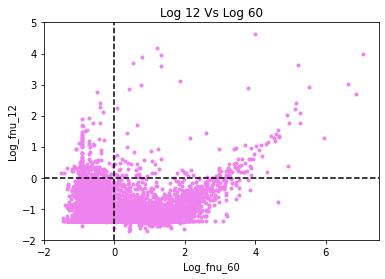

In [9]:
# Log 12 Vs Log 60

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Log_fnu_60, Log_fnu_12, marker=".", color="violet")

ax.set_xlim([-2, 7.5])
ax.set_ylim([-2, 5])

plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')



plt.title('Log 12 Vs Log 60')
plt.xlabel('Log_fnu_60')
plt.ylabel('Log_fnu_12')

Text(0, 0.5, 'Log_fnu_12')

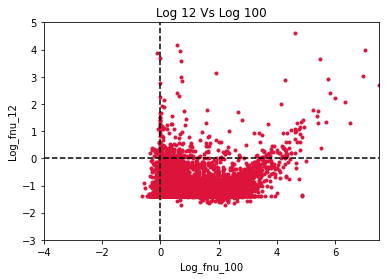

In [10]:
# Log 12/ Log 100

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Log_fnu_100, Log_fnu_12, marker=".", color="crimson")

ax.set_xlim([-4, 7.5])
ax.set_ylim([-3, 5])

plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')

plt.title('Log 12 Vs Log 100')
plt.xlabel('Log_fnu_100')
plt.ylabel('Log_fnu_12')

Text(0, 0.5, 'Log_fnu_25')

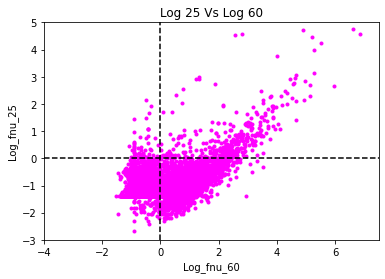

In [11]:
# log 25/ Log 60

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Log_fnu_60, Log_fnu_25, marker=".", color="magenta")

ax.set_xlim([-4, 7.5])
ax.set_ylim([-3, 5])

plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')

plt.title('Log 25 Vs Log 60')
plt.xlabel('Log_fnu_60')
plt.ylabel('Log_fnu_25')

## 1.2 Gráficas de razones

Log_12_25 / Log_12_60  
Log_12_25 / Log_12_100  
Log_25_60 / Log_25_100  
Log_25_100 / Log_60_100  
Log_12_100 / Log_25_60

Text(0, 0.5, 'Log_12_60')

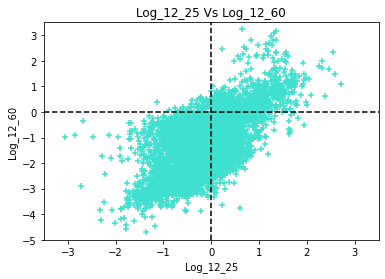

In [12]:
# Log_12_25 / Log_12_60

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Log_12_25, Log_12_60, marker="+", color="turquoise")

ax.set_xlim([-3.5, 3.5])
ax.set_ylim([-5, 3.5])

plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')

plt.title('Log_12_25 Vs Log_12_60')
plt.xlabel('Log_12_25')
plt.ylabel('Log_12_60')

Text(0, 0.5, 'Log_12_100')

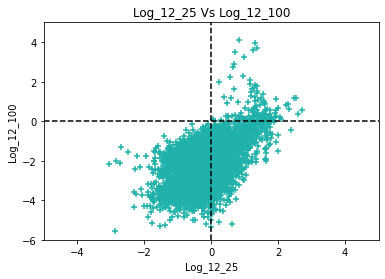

In [13]:
# Log_12_25 / Log_12_100

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Log_12_25, Log_12_100, marker="+", color="lightseagreen")

ax.set_xlim([-5, 5])
ax.set_ylim([-6, 5])

plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')

plt.title('Log_12_25 Vs Log_12_100')
plt.xlabel('Log_12_25')
plt.ylabel('Log_12_100')

Text(0, 0.5, 'Log_25_100')

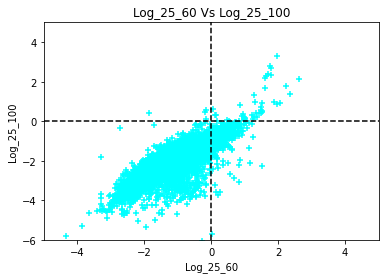

In [14]:
# Log_25_60 / Log_25_100

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Log_25_60, Log_25_100, marker="+", color="aqua")

ax.set_xlim([-5, 5])
ax.set_ylim([-6, 5])

plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')

plt.title('Log_25_60 Vs Log_25_100')
plt.xlabel('Log_25_60')
plt.ylabel('Log_25_100')

Text(0, 0.5, 'Log_60_100')

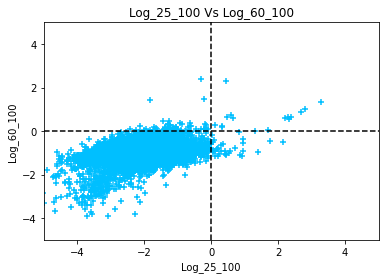

In [15]:
# Log_25_100 / Log_60_100

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Log_25_100, Log_60_100, marker="+", color="deepskyblue")

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')

plt.title('Log_25_100 Vs Log_60_100')
plt.xlabel('Log_25_100')
plt.ylabel('Log_60_100')

Text(0, 0.5, 'Log_25_60')

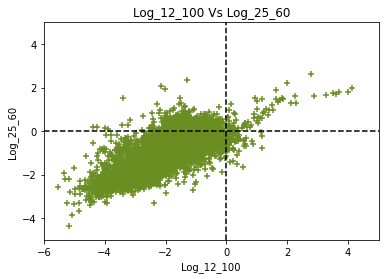

In [16]:
# Log_12_100 / Log_25_60

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Log_12_100, Log_25_60, marker="+", color="olivedrab")

ax.set_xlim([-6, 5])
ax.set_ylim([-5, 5])

plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')

plt.title('Log_12_100 Vs Log_25_60')
plt.xlabel('Log_12_100')
plt.ylabel('Log_25_60')

Text(0, 0.5, 'Log_60_100')

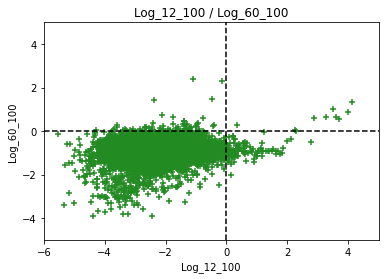

In [21]:
# Log_12_100 / Log_60_100

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Log_12_100, Log_60_100, marker="+", color="forestgreen")

ax.set_xlim([-6, 5])
ax.set_ylim([-5, 5])

plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')

plt.title('Log_12_100 / Log_60_100')
plt.xlabel('Log_12_100')
plt.ylabel('Log_60_100')

## Escogemos

Text(0, 0.5, 'Log_fnu_12')

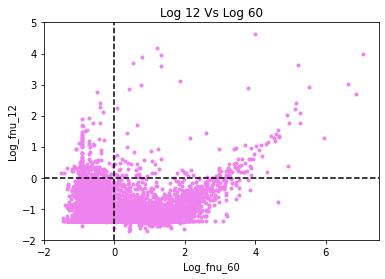

In [18]:
# Log 12 Vs Log 60

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Log_fnu_60, Log_fnu_12, marker=".", color="violet")

ax.set_xlim([-2, 7.5])
ax.set_ylim([-2, 5])

plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')


plt.title('Log 12 Vs Log 60')
plt.xlabel('Log_fnu_60')
plt.ylabel('Log_fnu_12')

Text(0, 0.5, 'Log_12_60')

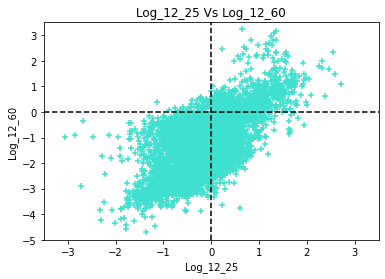

In [19]:
# Log_12_25 / Log_12_60

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Log_12_25, Log_12_60, marker="+", color="turquoise")

ax.set_xlim([-3.5, 3.5])
ax.set_ylim([-5, 3.5])

plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')

plt.title('Log_12_25 Vs Log_12_60')
plt.xlabel('Log_12_25')
plt.ylabel('Log_12_60')